# Hopfield 🫠

https://towardsdatascience.com/hopfield-networks-neural-memory-machines-4c94be821073

### Libraries

In [201]:
import utilities as ff
from matplotlib import pyplot as plt
import numpy as np
import pathlib
import PIL
import PIL.Image
import utilities as ff
import tqdm

import tensorflow as tf
from tensorflow.keras import activations, layers, optimizers, losses

### Hopfield class

In [202]:
import random

In [203]:
class Hopfield_Net:  # network class
    # init ialize network variables and memory
    def __init__(self, input, state):

        
        # patterns for network training / retrieval
        self.memory = np.array(input)
        # single vs. multiple memories
        if self.memory.size > 1:
            self.n = self.memory.shape[1]
        else:
            self.n = len(self.memory)
        # network construction
        self.state = np.array(state)  # state vector
        self.weights = np.zeros((self.n, self.n))  # weights vector
        self.energies = []  # container for tracking of energy

        self.pointer = 0
        self.order = list(range(self.n))
        random.shuffle(self.order)

    def network_learning(self):  # learn the pattern / patterns
        self.weights = (
            (1 / self.memory.shape[0]) * self.memory.T @ self.memory
        )  # hebbian learning
        np.fill_diagonal(self.weights, 0)

    def update_network_state(self, n_update):  # update network

        for _ in range(n_update): #update n neurons randomly

            self.rand_index = self.order[self.pointer]

            # Compute activation for randomly indexed neuron
            self.index_activation = np.dot(self.weights[self.rand_index, :], self.state)
            # threshold function for binary state change
            if self.index_activation < 0:
                self.state[self.rand_index] = -1
            else:
                self.state[self.rand_index] = 1

            self.pointer = (self.pointer + 1 ) % self.n

    def compute_energy(self):  # compute energy
        self.energy = -0.5 * np.dot(np.dot(self.state.T, self.weights), self.state)
        self.energies.append(self.energy)


### Dataset

In [204]:
batch_size = 1
img_height = 100
img_width = 100
color_mode='grayscale'
seed=42
data_dir = pathlib.Path("downloads\CatsDogs")

In [205]:
ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    color_mode=color_mode,
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 24646 files belonging to 3 classes.


In [206]:
ds=ds.take(250)

In [207]:
normalization_layer = tf.keras.layers.Rescaling(scale=1.0/255, offset=-0.5)

In [208]:
normalized_ds = ds.map(lambda x, y: (normalization_layer(x), y))

In [209]:
images=[]
labels=np.array([])
for batch in tqdm.tqdm(normalized_ds):
    #sobel=tf.image.sobel_edges(batch[0])
    #sobel_x=np.asarray(sobel[0,:,:,:,1])
    arr = np.squeeze(tf.math.sign(batch[0]))
    images.append(arr)
    labels=np.append(labels,(int(batch[1][0])))

100%|██████████| 250/250 [00:00<00:00, 262.86it/s]


In [210]:
images=np.array(images)
images.shape

(250, 100, 100)

In [211]:
images=images.reshape((-1,10000))

In [212]:
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0.

### Training

In [ ]:
"""
size
treshold

"""

In [225]:
memories_list=images[:4]

In [226]:
memories_list.shape

(4, 10000)

In [230]:
#initialize Hopfield object
H_Net = Hopfield_Net(memories_list, images[5])
H_Net.network_learning()

### Test

In [231]:
import pygame

error: display Surface quit

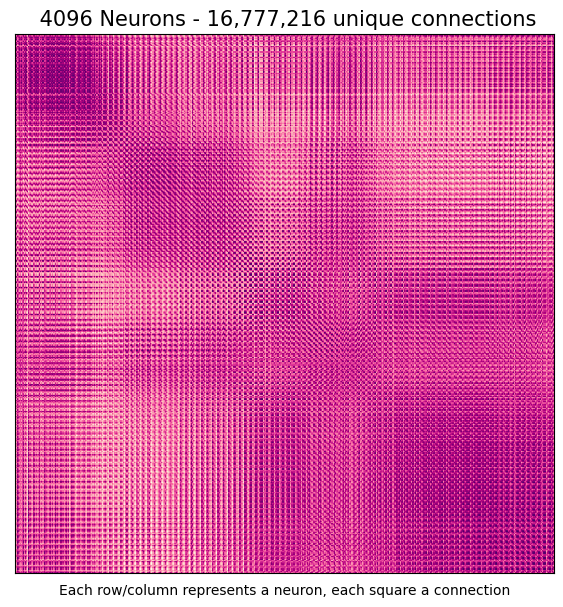

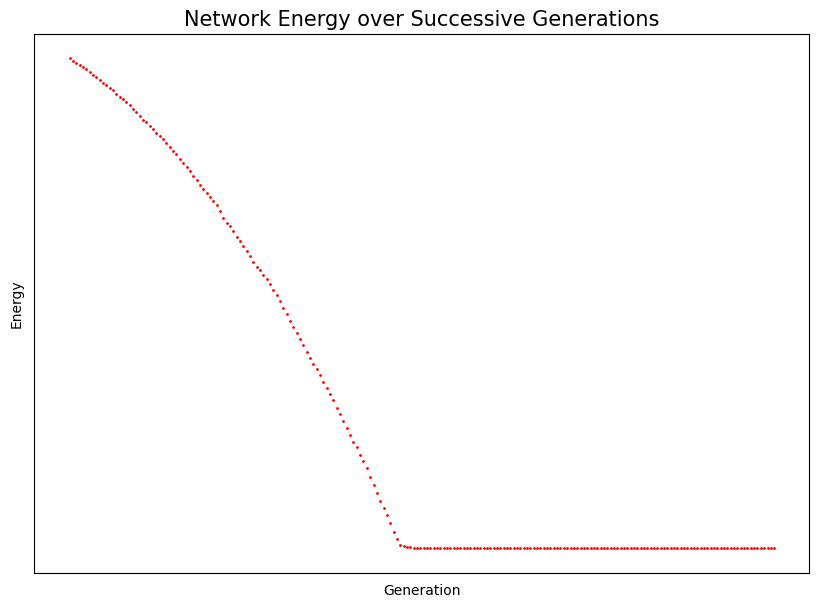

In [232]:
# Draw it all out, updating board each update iteration
cellsize = 5
img_size = 100

pygame.init()  # initialize pygame
# set dimensions of board and cellsize -  28 X 28  ~ special display surface
surface = pygame.display.set_mode((img_size * cellsize, img_size * cellsize))
pygame.display.set_caption("   ")


# kill pygame if user exits window
Running = True
# main animation loop
while Running:
    for event in pygame.event.get():
        pygame.time.wait(1)
        if event.type == pygame.QUIT:
            Running = False

            # plot weights matrix
            plt.figure("weights", figsize=(10, 7))
            plt.imshow(H_Net.weights, cmap="RdPu")  #
            plt.xlabel("Each row/column represents a neuron, each square a connection")

            plt.title(" 4096 Neurons - 16,777,216 unique connections", fontsize=15)
            plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

            # plot energies
            plt.figure("Energy", figsize=(10, 7))
            x = np.arange(len(H_Net.energies))
            plt.scatter(x, np.array(H_Net.energies), s=1, color="red")
            plt.xlabel("Generation")
            plt.ylabel("Energy")
            plt.title("Network Energy over Successive Generations", fontsize=15)
            plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

            # quit pygame
            pygame.quit()

    cells = H_Net.state.reshape(img_size, img_size).T

    # fills surface with color
    surface.fill((211, 211, 211))

    # loop through network state array and update colors for each cell
    for r, c in np.ndindex(cells.shape):  # iterates through all cells in cells matrix
        if cells[r, c] == -1:
            col = (135, 206, 250)

        elif cells[r, c] == 1:
            col = (0, 0, 128)

        else:
            col = (255, 140, 0)
        pygame.draw.rect(
            surface, col, (r * cellsize, c * cellsize, cellsize, cellsize)
        )  # draw new cell_

    # update network state
    H_Net.update_network_state(100)
    H_Net.compute_energy()
    pygame.display.update()  # updates display from new .draw in update function


In [ ]:
from scipy.spatial import distance

for i, e in enumerate(images[:2]):
    # print((e.shape))
    # print((H_Net.state.shape))
    # break
    v = distance.hamming(e, H_Net.state)
    # if (e == H_Net.state).all():
    print(v)

0.4883
1.0
0.462
0.4129
0.4269
0.5463
0.6101
0.6318
0.5074
0.6079


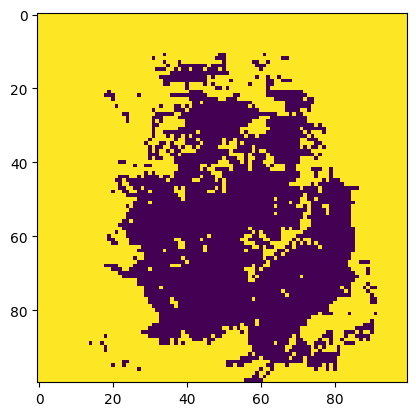

In [ ]:
plt.imshow(images[11].reshape((100,100)))
plt.show()

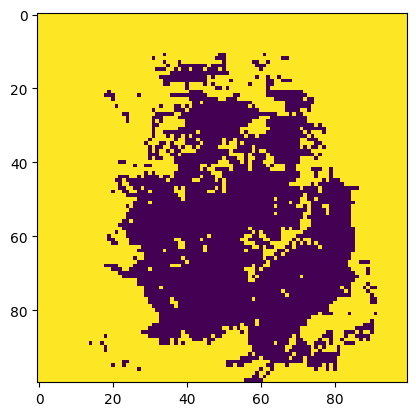

In [ ]:
plt.imshow(H_Net.state.reshape((100,100)))
plt.show()

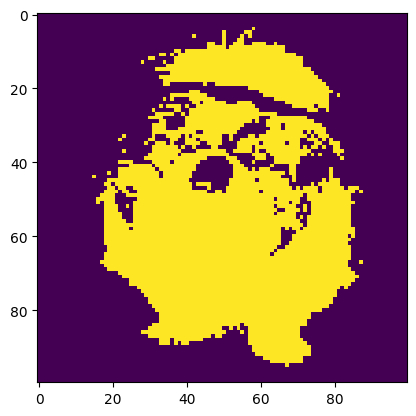

In [ ]:
plt.imshow(images[7].reshape((100,100)))
plt.show()

### MNIST's game

In [ ]:
#for MNIST fetch
import requests, gzip, os, hashlib
import pygame

#Fetch MNIST dataset from the ~SOURCE~
def fetch_MNIST(url):
  fp = os.path.join(hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  
  return np.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()

def MNIST_Hopfield(): 
    #test out the Hopfield_Network object on some MNIST data
    #fetch MNIST dataset for some random memory downloads
    
    X = fetch_MNIST(
        "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
        )[0x10:].reshape((-1,784))
    
    #convert to binary
    X_binary = np.where(X>20, 1,-1)

    #Snag a memory from computer brain
    memories_list = np.array([X_binary[np.random.randint(len(X))]])
    
    #initialize Hopfield object
    H_Net = Hopfield_Net(memories_list)
    H_Net.network_learning()


    #Draw it all out, updating board each update iteration
    cellsize = 20
   
    pygame.init() #initialize pygame
    #set dimensions of board and cellsize -  28 X 28  ~ special display surface
    surface = pygame.display.set_mode((28*cellsize,28*cellsize)) 
    pygame.display.set_caption("   ")
    

    #kill pygame if user exits window
    Running = True
    #main animation loop
    while Running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                Running = False
               
                #plot weights matrix
                plt.figure("weights", figsize=(10,7))
                plt.imshow(H_Net.weights,cmap='RdPu') #
                plt.xlabel("Each row/column represents a neuron, each square a connection")
        
                plt.title(" 4096 Neurons - 16,777,216 unique connections",fontsize=15)
                plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

                #plot energies
                plt.figure("Energy",figsize=(10,7))
                x = np.arange(len(H_Net.energies))
                plt.scatter(x,np.array(H_Net.energies),s=1,color='red')
                plt.xlabel("Generation")
                plt.ylabel("Energy")
                plt.title("Network Energy over Successive Generations",fontsize=15)
                plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

                #quit pygame
                pygame.quit()
    
                
        cells = H_Net.state.reshape(28,28).T
       
        #fills surface with color
        surface.fill((211,211,211)) 
       
        #loop through network state array and update colors for each cell
        for r, c in np.ndindex(cells.shape): #iterates through all cells in cells matrix
            if cells[r,c] == -1:
                col = (135,206,250)
            
            elif cells[r,c] == 1:
                col = (0,0,128)
            
            else: 
                col = (255,140,0)
            pygame.draw.rect(surface, col, (r*cellsize, c*cellsize, \
                                              cellsize, cellsize)) #draw new cell_                 
        
        #update network state
        H_Net.update_network_state(16)
        H_Net.compute_energy()
        pygame.display.update() #updates display from new .draw in update function
        pygame.time.wait(1000)

In [ ]:
MNIST_Hopfield()
plt.show()